## Train a dnnae for handwritten digits simulation

In [1]:
# Copyright (C) 2018 Zhixian MA <zx@mazhixian.me>

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from dnnae.dnn import dnn
from dnnae.utils import utils

/home/mzx/.local/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from dnnae.configs import config_mnist_bn
from dnnae.configs import config_train

### Load mnist data

In [6]:
# Step1 load MNITST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True, validation_size=5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
cf = config_mnist_bn
tr_cf = config_train

### Build the net and train

In [8]:
net = dnn(cf)
net.dnn_build()
# print the net structure
net.dnn_print()

Layer ID    Layer type    Layer shape
0 Input layer [None, 784]
1 FC layer 0 [None, 256]
2 BN layer 0 [None, 256]
3 FC layer 1 [None, 128]
4 BN layer 1 [None, 128]
5 Softmax layer [None, 10]
6 Encoder layer [None, 32]
7 FC layer 1 [None, 128]
8 BN layer 1 [None, 128]
9 FC layer 0 [None, 256]
10 BN layer 0 [None, 256]
11 Output layer [None, 784]


In [9]:
# train the net
net.dnn_train_mnist_cmb(mnist=mnist, train_configs=tr_cf)

[2018-03-29: 21:09:59]: Epochs    Trn_loss_mse    Val_loss_mse    Trn_loss_ce    Val_loss_ce    Trn_acc    Val_acc
[2018-03-29: 21:10:03]: 0    0.09327182    0.06087573    0.63936099    0.81755777    0.8162    0.8876
[2018-03-29: 21:10:22]: 5    0.02536053    0.02362961    0.11718460    0.11021183    0.9679    0.9678
[2018-03-29: 21:10:42]: 10    0.01803466    0.01691318    0.07674887    0.08720252    0.9790    0.9736
[2018-03-29: 21:11:01]: 15    0.01420287    0.01288835    0.06028467    0.07941795    0.9835    0.9766
[2018-03-29: 21:11:21]: 20    0.01226631    0.01090664    0.04678404    0.07463818    0.9881    0.9776
[2018-03-29: 21:11:40]: 25    0.01107594    0.00970362    0.03774372    0.07588881    0.9900    0.9766
[2018-03-29: 21:12:00]: 30    0.01026935    0.00899743    0.03066264    0.07746560    0.9926    0.9772
[2018-03-29: 21:12:20]: 35    0.00970752    0.00846974    0.02615600    0.08132840    0.9933    0.9758
[2018-03-29: 21:12:39]: 40    0.00931584    0.00807546    0.022

### Test the net

In [10]:
n_examples = 10
img_test, _ = mnist.test.next_batch(n_examples)

In [12]:
img_est = net.sess.run(
    net.outputs_de, 
    feed_dict={net.inputs: img_test, 
               net.outputs: img_test,
               net.is_training: False
               })

/home/mzx/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


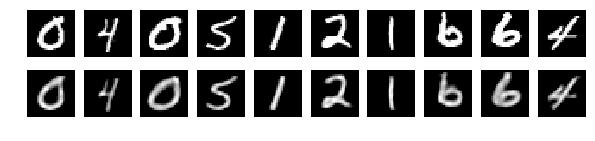

In [15]:
import numpy as np
fig, axs = plt.subplots(2, n_examples, figsize=(n_examples, 2))
for example_i in range(n_examples):
    # original
    axs[0][example_i].imshow(np.reshape(img_test[example_i, :], (28, 28)), cmap='gray')
    axs[0][example_i].axis('off')
    # reconstructed
    axs[1][example_i].imshow(np.reshape(img_est[example_i, :], (28, 28)), cmap='gray')
    axs[1][example_i].axis('off')

fig.show()
plt.draw()

### Save the net

In [17]:
import os
foldname = "./dnnae_mnist"
name = "dnnae.pkl"
netname = "model_dnnae.ckpt"
namepath = os.path.join(foldname, name)
netpath = os.path.join(foldname, netname)
savedict = {'netpath': netpath}
if os.path.exists(foldname):
    os.system("rm -r %s" % (foldname))
os.mkdir(foldname)
utils.save_net(sess=net.sess,
               namepath=namepath,
               netpath=netpath,
               savedict=savedict)